### Preprocessing data

scikit-learn requirements
- numeric data
- no missing values
With real-world data:
- this is rarely the case
- we will often need to preprocess our data first

Dealing with categorical features
- scikit-learn will not accept categorical features by default
- need to convert categorical features into numeric values
- convert to binary features called dummy variables
  - 0 : observation was NOT that category
  - 1 : observation was that category

In [5]:
import pandas as pd
import numpy as np
# Read the CSV file containing dummy variables
music_df = pd.read_csv(r"C:\Users\anoushka chatterjee\Desktop\Data camp\music_genre_with_popularity.csv")

# Print the first few rows to understand the structure
print(music_df.head())

# Assuming the CSV contains columns like 'Anime', 'Blues', etc.
# Transform the dummy variables back into a single "Genre" column
genre_columns = music_df.columns
music_df['Genre'] = music_df[genre_columns].idxmax(axis=1)

# Now create dummy variables from the "Genre" column
music_dummies = pd.get_dummies(music_df["Genre"], drop_first=True)

print(music_dummies.head())

   Popularity  Genre_Anime  Genre_Blues  Genre_Classical  Genre_Country  \
0           0            1            0                0              0   
1           1            0            1                0              0   
2           0            0            0                1              0   
3           1            0            0                0              1   
4           0            0            0                0              0   

   Genre_Electronic  Genre_Hip-Hop  Genre_Jazz  Genre_Rap  Genre_Rock  
0                 0              0           0          0           0  
1                 0              0           0          0           0  
2                 0              0           0          0           0  
3                 0              0           0          0           0  
4                 1              0           0          0           0  
   Genre_Classical  Genre_Electronic  Genre_Jazz  Genre_Rock  Popularity
0            False             False       F

In [6]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("Genre", axis=1)

In [7]:
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

Index(['Popularity', 'Genre_Anime', 'Genre_Blues', 'Genre_Classical',
       'Genre_Country', 'Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Jazz',
       'Genre_Rap', 'Genre_Rock', 'Genre_Genre_Classical',
       'Genre_Genre_Electronic', 'Genre_Genre_Jazz', 'Genre_Genre_Rock',
       'Genre_Popularity'],
      dtype='object')


In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = music_dummies.drop("Popularity",axis=1).values
y=music_dummies["Popularity"].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

kf=KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, x_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[0.28426252 0.31732388 0.21052632 0.21052632 0.21052632]


### Handling missing data

Missing data:
- no value for a feature in a particular row
- this can occur because:
  - there may have been no obervation
  - the data might be corrupt

In [9]:
print(music_df.isna().sum().sort_values())

Popularity          0
Genre_Anime         0
Genre_Blues         0
Genre_Classical     0
Genre_Country       0
Genre_Electronic    0
Genre_Hip-Hop       0
Genre_Jazz          0
Genre_Rap           0
Genre_Rock          0
Genre               0
dtype: int64


In [18]:

## dropping missing data
'''
music_df= music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])
print(music_df.isna().sum().sort_values())
'''

## we cant perform this because of insufficient dataset. i couldnt find the proper
## dataset taught in the course

'\nmusic_df= music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])\nprint(music_df.isna().sum().sort_values())\n'

Imputing values
- imputation - use subject matter expertise to replace missing data with educated guesses
- common to use the mean
- can also use the median or another value
- for categorical values, we typically use the most frequent value- the mode
- must split our data first, to avoid data leakage

In [16]:
'''
from sklearn.impute import SimpleImputer
x_cat= music_df["genre"].values.reshape(-1,1)
x_num = music_df.drop(["genre","popularity"],axis=1).values
y=music_df["popularity"].values
x_train_cat, x_test_cat, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=12)
x_train_num, x_test_num, y_train, y_test = train_test_split(x_num, y, test_size=0.2, random_state=12)
imp_cat=SimpleImputer(strategy="most_frequent")
x_train_Cat=imp_cat.fit_transform(x_train_cat)
x_test_cat=imp_cat.tranform(x_test_cat)
'''

'\nfrom sklearn.impute import SimpleImputer\nx_cat= music_df["genre"].values.reshape(-1,1)\nx_num = music_df.drop(["genre","popularity"],axis=1).values\ny=music_df["popularity"].values\nx_train_cat, x_test_cat, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=12)\nx_train_num, x_test_num, y_train, y_test = train_test_split(x_num, y, test_size=0.2, random_state=12)\nimp_cat=SimpleImputer(strategy="most_frequent")\nx_train_Cat=imp_cat.fit_transform(x_train_cat)\nx_test_cat=imp_cat.tranform(x_test_cat)\n'

'''

imp_num = SimpleImputer()

x_train_num = imp_num.fit_transform(x_train_num)

x_test_num = imp_num.transform(x_test_num)

x_train = np.append(x_train_num, x_train_cat, axis=1)

x_test = np.append(x_test_num, x_test_cat, axis=1)

'''
- imputers are known as transformers

In [17]:
# imputing within a pipeline

'''
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock",1,0)
x = music_df.drop("genre",axis=1).values
y = music_df["genre"].values
'''

# to build a pipeline we construct a list

'''
steps = [("imputation", SimpleImputer()), ("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
pipeline.fit(x_train, y_train)
pipeline.score(x_test, y_test)
'''

'\nsteps = [("imputation", SimpleImputer()), ("logistic_regression", LogisticRegression())]\npipeline = Pipeline(steps)\nx_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)\npipeline.fit(x_train, y_train)\npipeline.score(x_test, y_test)\n'

Centering and scaling

why scale our data?
- many models use some form of distance to inform them
- features on large scales can disproportionately influence the model
- Example: KNN uses distance explicitly when making predictions
- we want features to be on a similar scale
- normalizing or standardizing (scaling and centering)

How to scale our data?
- subtract the mean and divide by variance
  - all features are centered around zero and have a variance of one
  - this is called standardization
- can also subtract the minimum and divide by the range
  - minimum zero and maximum one
- can also normalize so the data ranges from -1 to +1

In [21]:
#scaling in sklearn

'''
from sklearn.preprocessing import StandardScaler
x= music_df.drop("genre",axis=1).values
y= music_df["genre"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(np.mean(x), np.std(x))
print(np.mean(x_train_scaled), np.std(x_train_scaled))
'''

## scaling in a pipeline

'''
steps = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)
knn.scaled = pipeline.fit(x+train, y_train)
y_pred = knn_scaled.predict(x_test)
print(knn_scaled.score(x_test, y_test))
'''

#CV and scaling in a pipeline

''' 
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()), ('knn',KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors":np.arange(1,50)}
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(x_train, y_train)
y_pred = cv.predict(x_test)
print(cv.best_score_)
'''


' \nfrom sklearn.model_selection import GridSearchCV\nsteps = [(\'scaler\', StandardScaler()), (\'knn\',KNeighborsClassifier())]\npipeline = Pipeline(steps)\nparameters = {"knn__n_neighbors":np.arange(1,50)}\nx_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=21)\ncv = GridSearchCV(pipeline, param_grid=parameters)\ncv.fit(x_train, y_train)\ny_pred = cv.predict(x_test)\nprint(cv.best_score_)\n'

# what i've learnt in this course

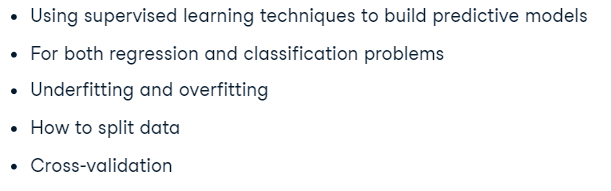
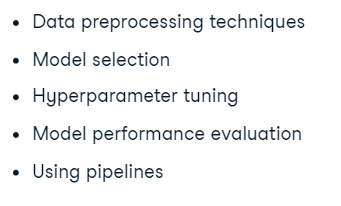